In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv("../data/bodyPerformance.csv")

print(df.head())
print(df.info())
print(df.describe())

    age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
0  27.0      M      172.3      75.24        21.3       80.0     130.0   
1  25.0      M      165.0      55.80        15.7       77.0     126.0   
2  31.0      M      179.6      78.00        20.1       92.0     152.0   
3  32.0      M      174.5      71.10        18.4       76.0     147.0   
4  28.0      M      173.8      67.70        17.1       70.0     127.0   

   gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm class  
0       54.9                     18.4            60.0          217.0     C  
1       36.4                     16.3            53.0          229.0     A  
2       44.8                     12.0            49.0          181.0     C  
3       41.4                     15.2            53.0          219.0     B  
4       43.5                     27.1            45.0          217.0     B  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 

**Descripción**

Hay 13.393 registros y 12 columnas.

Las variables son en su mayoría numéricas, salvo gender y class.

El rango de edad es de 21 a 64 años.

El salto largo (broad jump_cm), fuerza de agarre (gripForce) y flexibilidad (sit and bend forward_cm) muestran gran variabilidad.

**Normalizando los nombres de las columnas**


Pudimos observar que los nombres de las columnas no son consistentes, por lo que se procede a normalizarlos, para poder trabajar de manera más eficiente.

In [13]:
# Normalizar nombres de columnas
df.columns = (
    df.columns.str.strip()  # quitar espacios al inicio/final
              .str.lower()  # todo en minúscula
              .str.replace(' ', '_')  # espacios a guiones bajos
              .str.replace('-', '_')  # guiones a guiones bajos
              .str.replace('%', 'percent')  # % a "percent"
              .str.replace('[^0-9a-zA-Z_]', '')  # quitar cualquier otro caracter raro
)
print(df.columns.tolist())

['age', 'gender', 'height_cm', 'weight_kg', 'body_fat_percent', 'diastolic', 'systolic', 'gripforce', 'sit_and_bend_forward_cm', 'sit_ups_counts', 'broad_jump_cm', 'class']


**Corroborando si algunas columnas tienen valores mínimos sospechosos, lo cual podría indicar datos erróneos.**

In [43]:
# Count zeros in each column of the dataset
zeros_per_column = (df == 0).sum()

# Show only columns that have at least one zero
columns_with_zeros = zeros_per_column[zeros_per_column > 0]
print("\nColumns containing at least one zero value:")
print(columns_with_zeros)


Columns containing at least one zero value:
diastolic                    1
systolic                     1
gripforce                    3
sit_and_bend_forward_cm     12
sit_ups_counts             125
broad_jump_cm               10
dtype: int64


**Calculando el indice de masa corporal**

In [30]:
df['height_m'] = df['height_cm'] / 100
df['bmi'] = df['weight_kg'] / (df['height_m'] ** 2)
print(df[['height_cm', 'weight_kg', 'bmi']].head())

   height_cm  weight_kg        bmi
0      172.3      75.24  25.344179
1      165.0      55.80  20.495868
2      179.6      78.00  24.181428
3      174.5      71.10  23.349562
4      173.8      67.70  22.412439


['C' 'A' 'B' 'D']


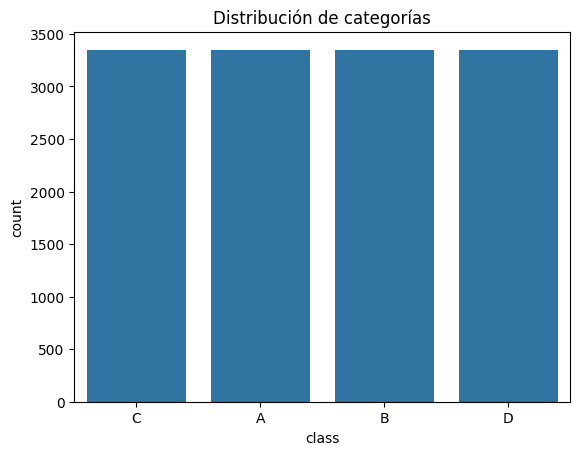

In [42]:
# Ver las categorías únicas en la columna de clasificación (A, B, C, D)
if 'class' in df.columns:
    print(df['class'].unique())
else:
    print("La columna de categorías no se encuentra, verifica el nombre.")

sns.countplot(x='class', data=df)
plt.title("Distribución de categorías")
plt.show()



**🏷️Categorías de rendimiento físico**

Las clases están bastante balanceadas:

    Clase A: 3348

    Clase B: 3347

    Clase C: 3349

    Clase D: 3349

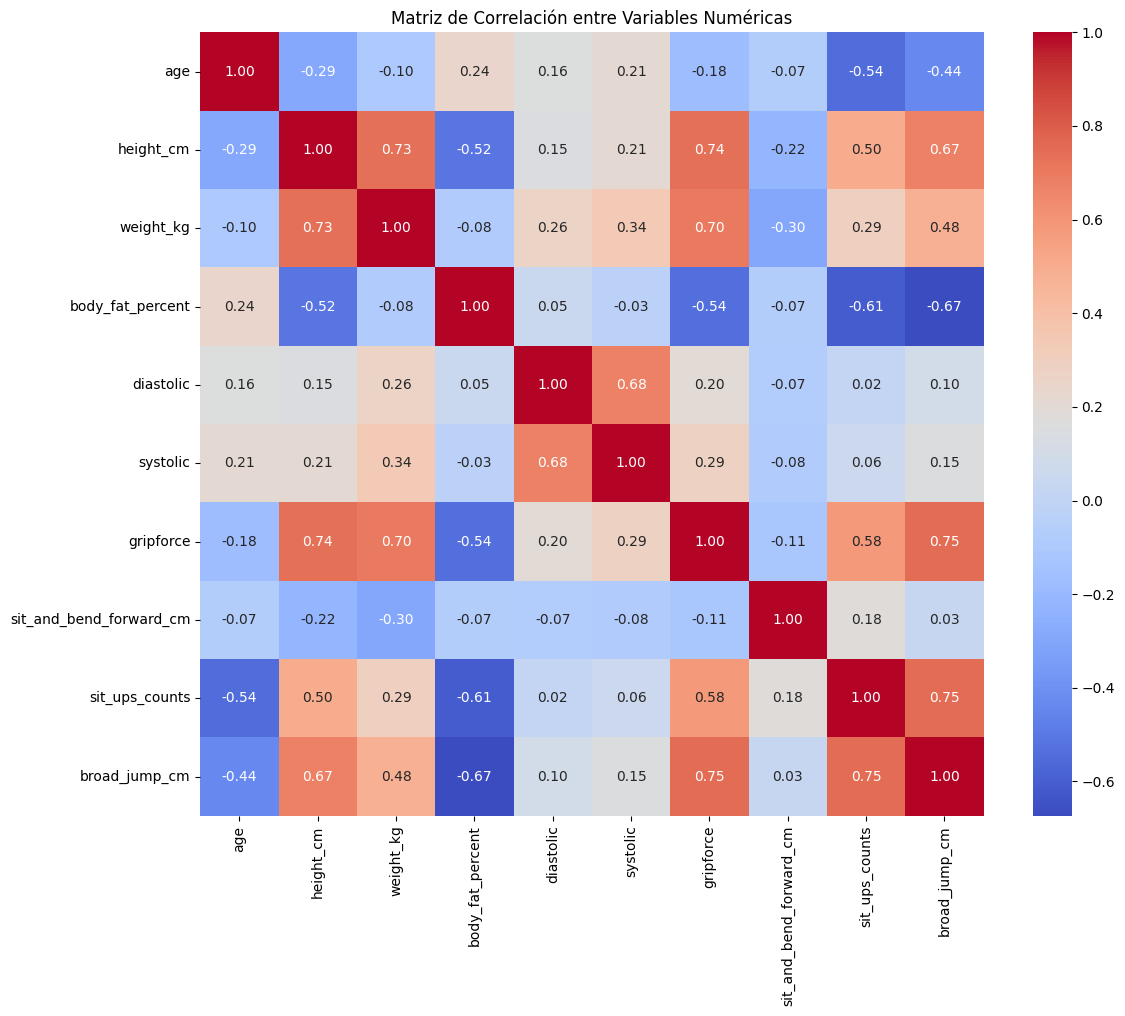

In [15]:
numeric_cols = df.select_dtypes(include=['float64']).columns
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Matriz de Correlación entre Variables Numéricas")
plt.tight_layout()
plt.show()

**📌 Hallazgos clave:**

___height_cm___ y ___weight_kg___: correlación positiva (~0.65), lo esperado. 

___gripForce___, ___sit-ups___, y ___broad jump___ están correlacionadas moderadamente entre sí (~0.4–0.5): indican buena condición física.

___diastolic___ y ___systolic___ tienen fuerte correlación (~0.75), como es típico en presión arterial.

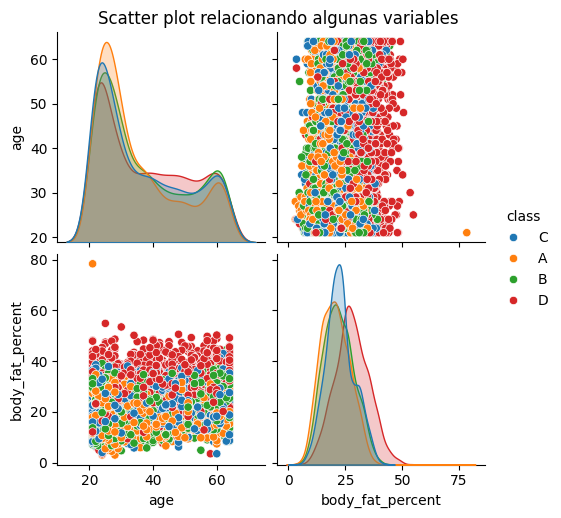

In [18]:
cols = ["age", "body_fat_percent"] 
sns.pairplot(df[cols + ["class"]], hue="class")  # Solo esas columnas + la de hue
plt.gcf().suptitle("Scatter plot relacionando algunas variables", y=1.02) 
plt.show()

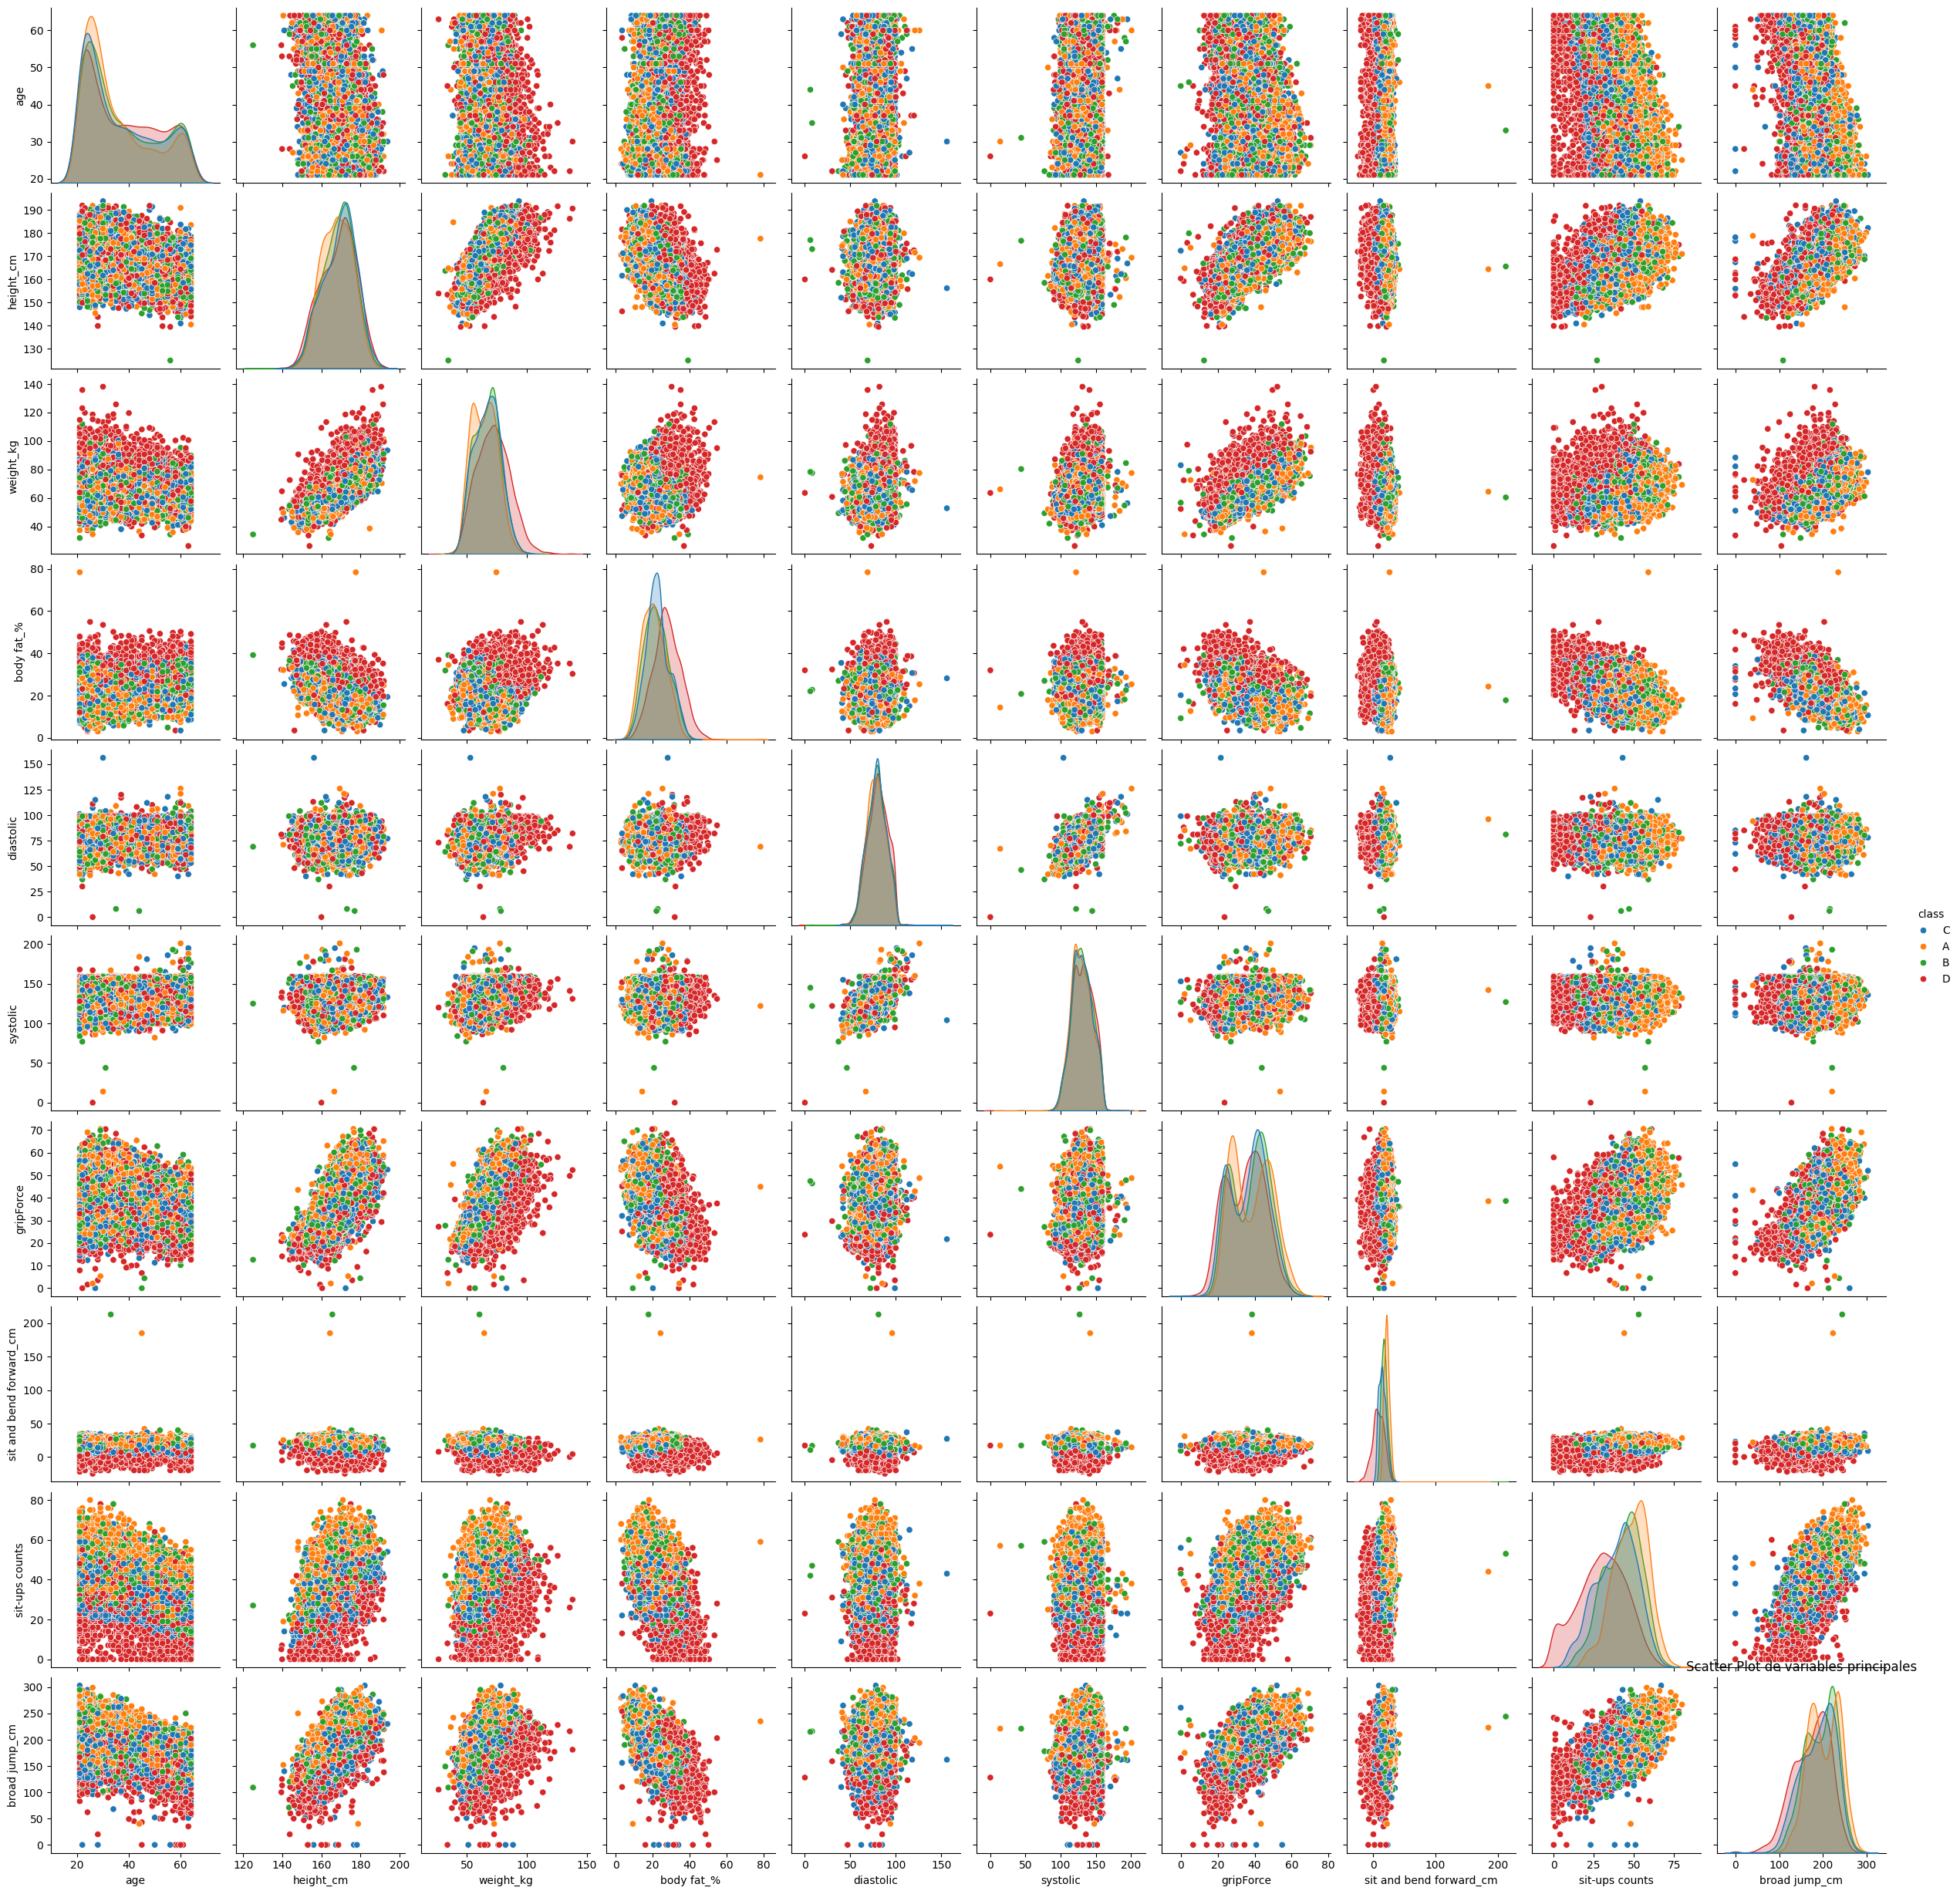

In [ ]:
sns.pairplot(df, hue="class")
plt.title("Scatter Plot de variables principales")
plt.show()

**Distribución de las variables numéricas**
Veremos distribuidos los datos en cada columna:

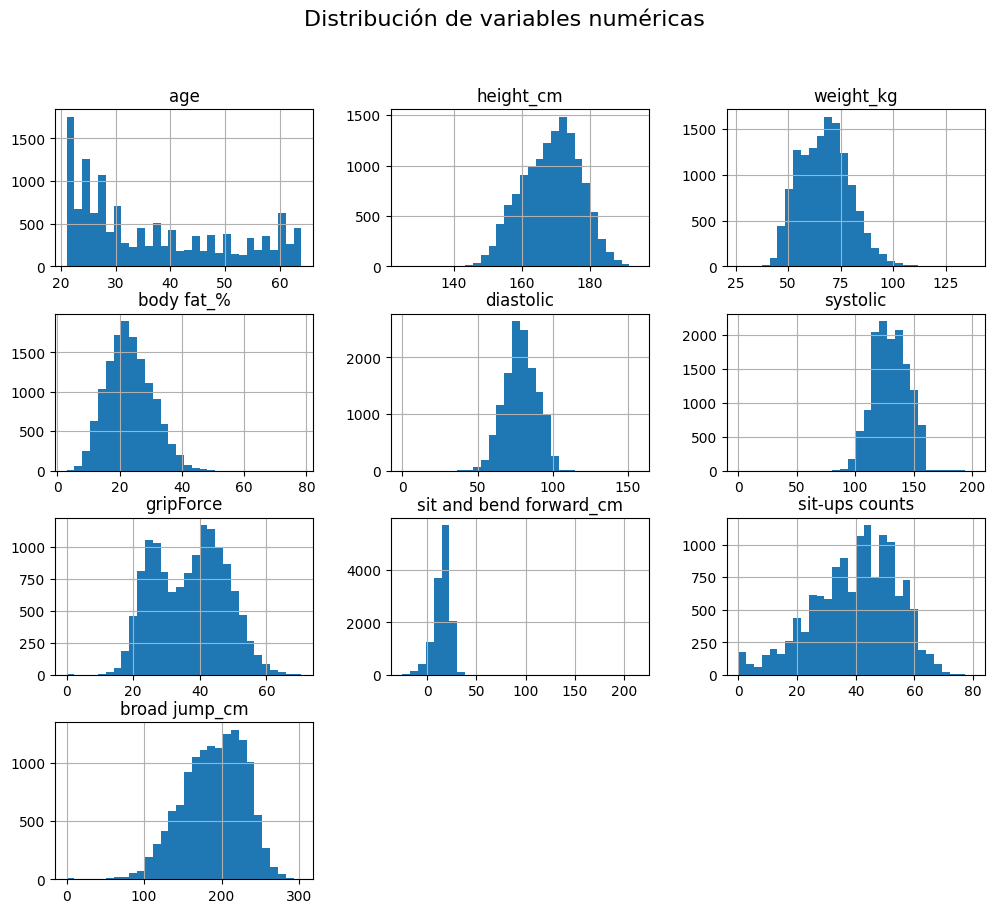

In [ ]:
df.hist(figsize=(12, 10), bins=30)
plt.suptitle("Distribución de variables numéricas", fontsize=16)
plt.show()

**Boxplots para analizar la variabilidad y posibles valores atípicos**
Esto es útil para ver la dispersión de los datos y detectar outliers:

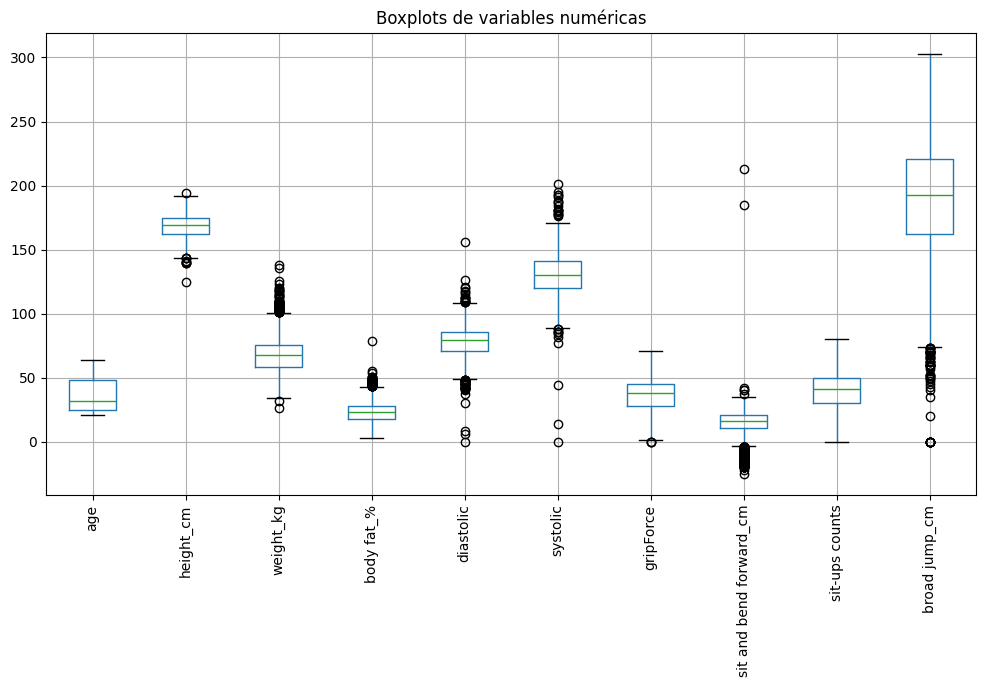

In [ ]:
plt.figure(figsize=(12,6))
df.boxplot(rot=90)
plt.title("Boxplots de variables numéricas")
plt.show()

**Gráfico de violín por categoría**
Este gráfico ayudará a ver la distribución de una variable según la categoría:


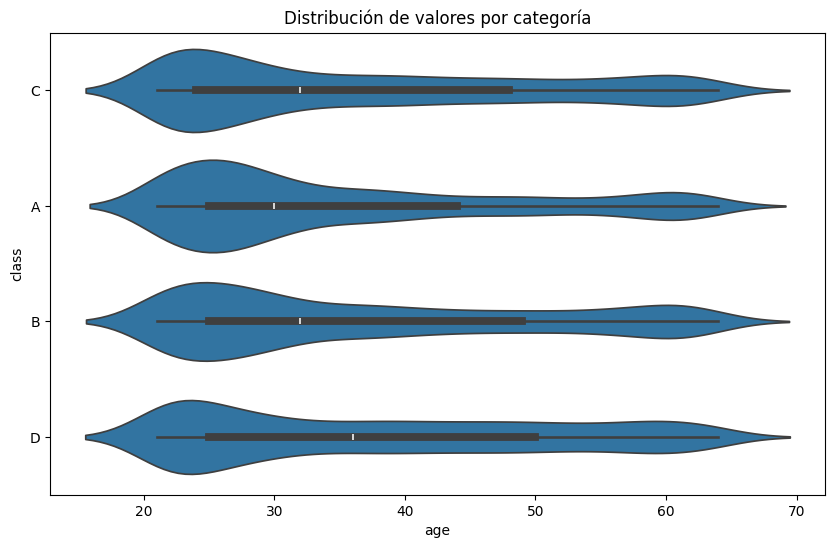

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x="age", y="class", data=df) 
plt.title("Distribución de valores por categoría")
plt.show()

**Heatmap de correlación con más detalle**

Visualizar cómo están distribuidas la columna categorica gender:

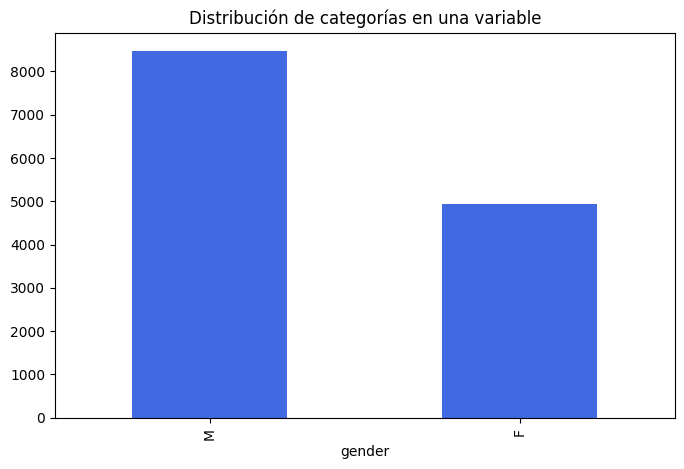

In [ ]:
plt.figure(figsize=(8,5))
df['gender'].value_counts().plot(kind='bar', color='royalblue')
plt.title("Distribución de categorías en una variable")
plt.show()

**Ver la distribución de clases según el género.**

<!-- **Ver la distribución de clases según el género.** -->

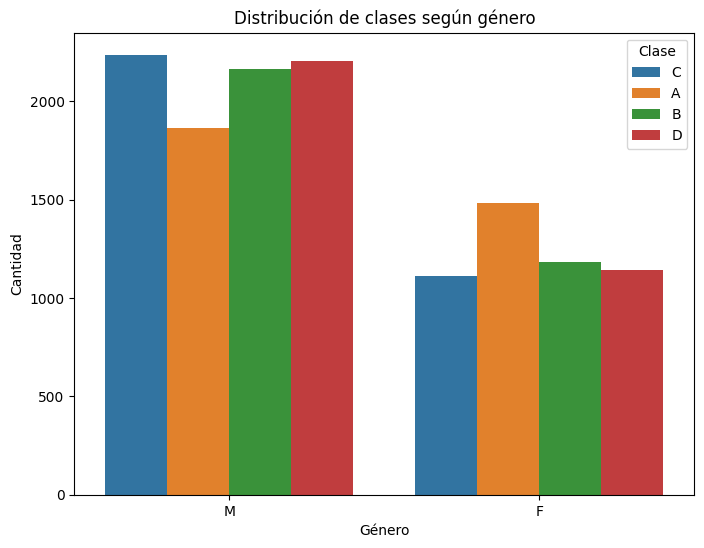

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="gender", hue="class")
plt.title("Distribución de clases según género")
plt.xlabel("Género")
plt.ylabel("Cantidad")
plt.legend(title="Clase")
plt.show()

**Comparar diferencias entre géneros para una variable específica**

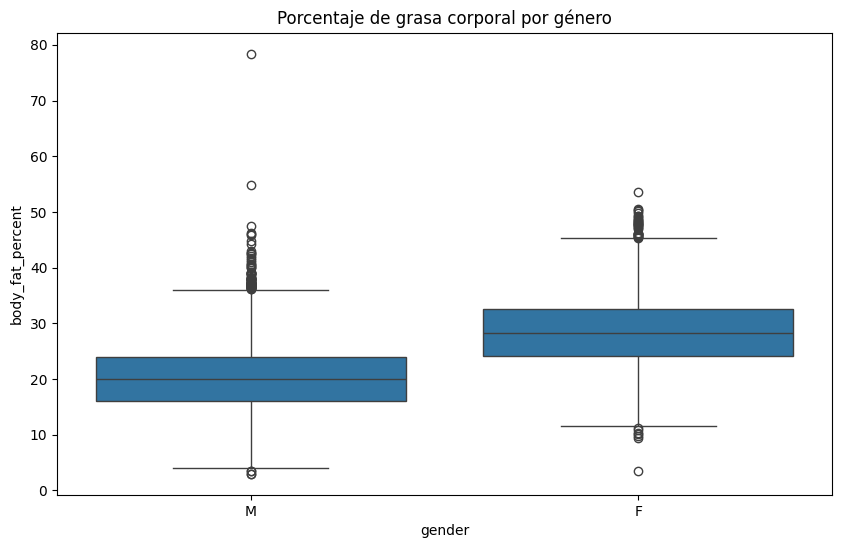

In [24]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="gender", y="body_fat_percent")
plt.title("Porcentaje de grasa corporal por género")
plt.show()

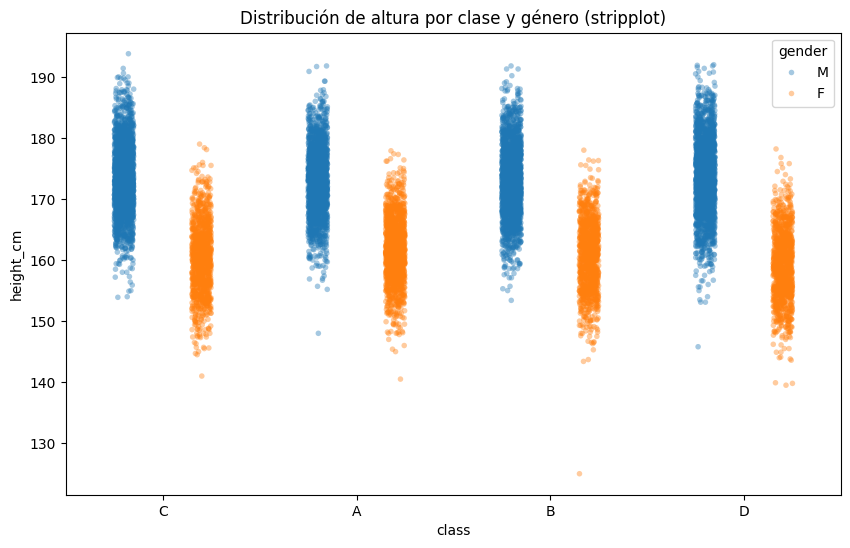

**Analizando la altura por genero y clases de una muestra de 1000 personas**

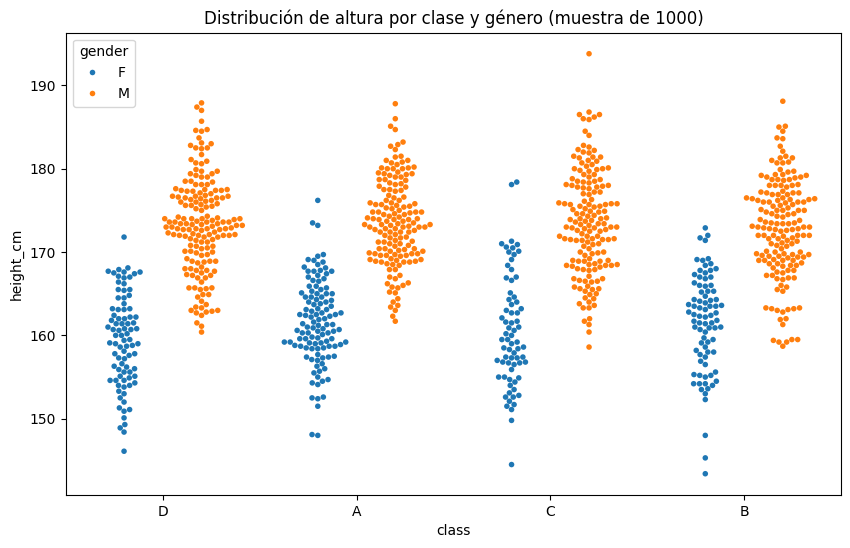

In [38]:
plt.figure(figsize=(10,6))
sns.swarmplot(data=df.sample(1000, random_state=42), x="class", y="height_cm", hue="gender", dodge=True, size=4)
plt.title("Distribución de altura por clase y género (muestra de 1000)")
plt.show()

**Forma mas eficiente de visualizar los datos, Stripplot puede agarrar todos los datos, en cambio swarmplot es menos eficiente y puede agarrar un conjunto pequeño de datos sin dar errores**

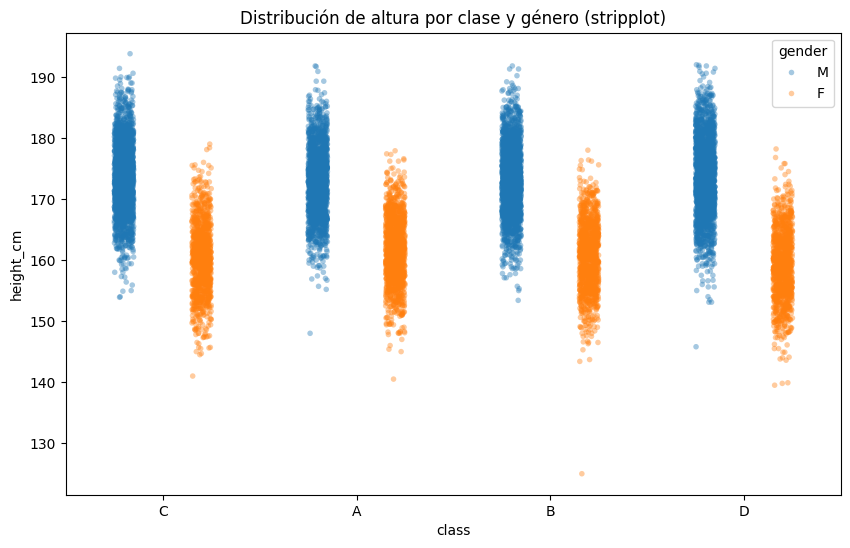

In [37]:
plt.figure(figsize=(10,6))
sns.stripplot(data=df, x="class", y="height_cm", hue="gender", dodge=True, alpha=0.4, size=4)
plt.title("Distribución de altura por clase y género (stripplot)")
plt.show()

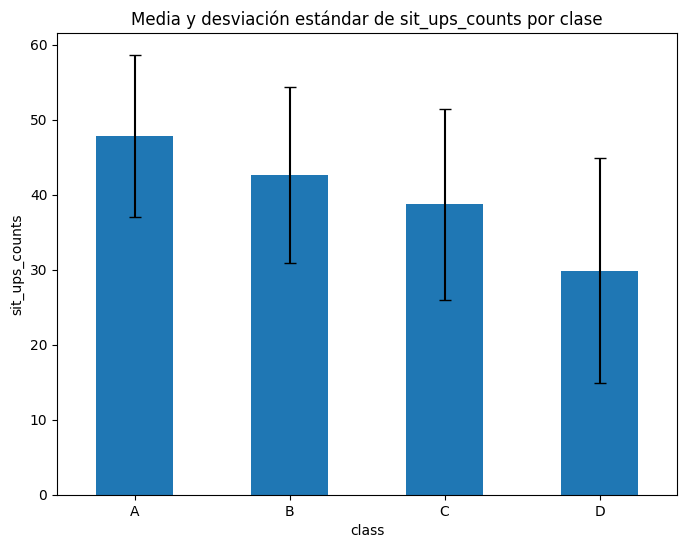

In [23]:
feature = "sit_ups_counts"  # Puedes cambiarlo por otra variable
grouped = df.groupby("class")[feature].agg(["mean", "std"]).sort_index()

grouped.plot(kind="bar", y="mean", yerr="std", legend=False, figsize=(8,6), capsize=4)
plt.title(f"Media y desviación estándar de {feature} por clase")
plt.ylabel(feature)
plt.xticks(rotation=0)
plt.show()

**Visualizar la distribución de una variable como bmi por clase**

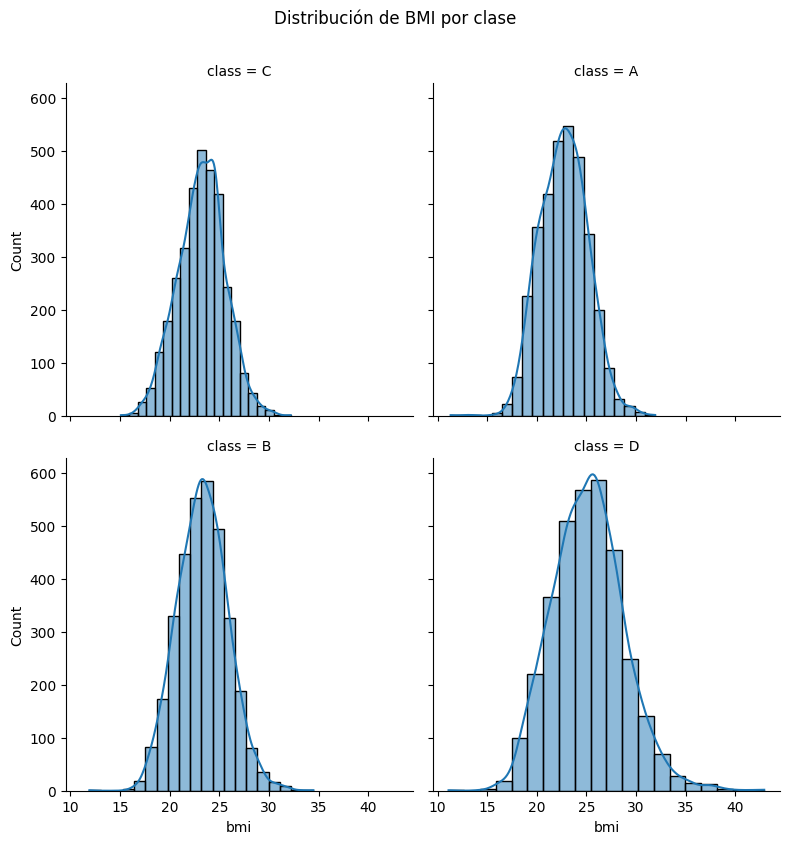

In [33]:
g = sns.FacetGrid(df, col="class", height=4, col_wrap=2)
g.map(sns.histplot, "bmi", bins=20, kde=True)
g.fig.suptitle("Distribución de BMI por clase", y=1.05)
plt.show()

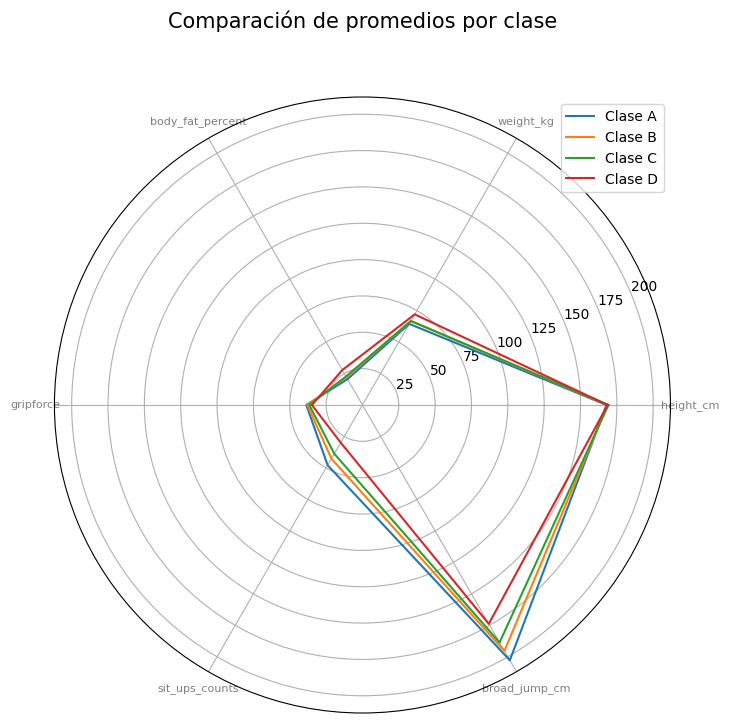

In [27]:
# Preparamos promedios por clase
features = ['height_cm', 'weight_kg', 'body_fat_percent', 'gripforce', 'sit_ups_counts', 'broad_jump_cm']
df_mean = df.groupby("class")[features].mean()

# Radar chart
categories = features
N = len(categories)
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]  # cerrar el círculo

plt.figure(figsize=(8, 8))
for idx, row in df_mean.iterrows():
    values = row.tolist()
    values += values[:1]
    plt.polar(angles, values, label=f'Clase {idx}')
    
plt.xticks(angles[:-1], categories, color='grey', size=8)
plt.title('Comparación de promedios por clase', size=15, y=1.1)
plt.legend()
plt.show()


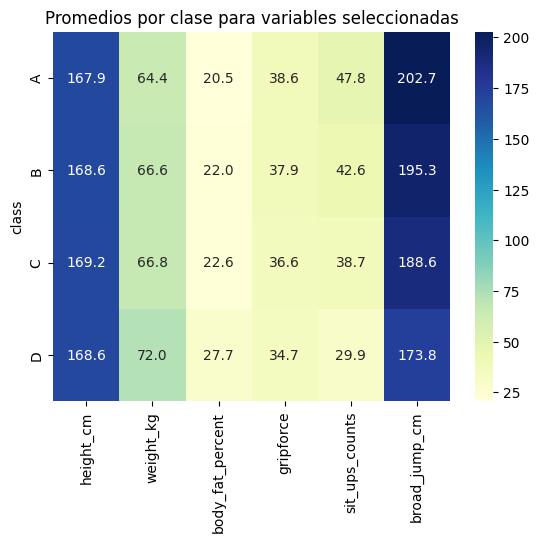

In [28]:
mean_by_class = df.groupby('class')[features].mean()
sns.heatmap(mean_by_class, annot=True, cmap="YlGnBu", fmt=".1f")
plt.title("Promedios por clase para variables seleccionadas")
plt.show()
